In [56]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam
from sklearn.feature_selection import mutual_info_classif
from keras.layers import LeakyReLU

# DOI 10.24432/C5HP4Z

In [42]:
nomes_colunas = ['Sample_code_number', 'Clump_thickness', 'Uniformity_of_cell_size',
       'Uniformity_of_cell_shape', 'Marginal_adhesion',
       'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin',
       'Normal_nucleoli', 'Mitoses', 'Class']

In [43]:
df = pd.read_csv('breast-cancer-wisconsin.data')
df.columns = nomes_colunas

In [44]:
df.head()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [45]:
df['Class'].value_counts()

Class
2    457
4    241
Name: count, dtype: int64

In [46]:
df.drop(columns=['Sample_code_number'], inplace=True)
df.replace('?', np.nan, inplace=True)
df = df.astype('float64')
df.dropna(inplace=True)

In [47]:
X = df.drop(columns=['Class'])
y = df['Class']

### InfoGain

In [48]:
mutual_info = mutual_info_classif(X, y)
info_gains = {X.columns[i]: mutual_info[i] for i in range(len(X.columns))}
info_gains = sorted(info_gains.items(), key=lambda x: x[1], reverse=True)
for col, mi in info_gains:
    print(f'{col}: {mi}')

Uniformity_of_cell_shape: 0.4862014462043476
Uniformity_of_cell_size: 0.4722669013618481
Bare_nuclei: 0.4039565909686824
Bland_chromatin: 0.3717182201047775
Single_epithelial_cell_size: 0.3561894581075524
Clump_thickness: 0.3255940912043449
Normal_nucleoli: 0.3221894669667371
Marginal_adhesion: 0.3178845422601069
Mitoses: 0.1326648364628895


### Divisão entre treino e teste

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32, stratify=y) # É bom usar stratify y pois
                                                                                                  #  as classes estão desbalanceadas

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [60]:
optimizer = Adam(learning_rate=0.0001)

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
print(history)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0208 - loss: 1.6574 - val_accuracy: 0.0585 - val_loss: 1.6328
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0987 - loss: 1.6104 - val_accuracy: 0.1659 - val_loss: 1.5873
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1958 - loss: 1.5712 - val_accuracy: 0.2537 - val_loss: 1.5403
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3623 - loss: 1.5334 - val_accuracy: 0.5951 - val_loss: 1.4930
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6340 - loss: 1.4760 - val_accuracy: 0.7902 - val_loss: 1.4445
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8191 - loss: 1.4291 - val_accuracy: 0.8780 - val_loss: 1.3948
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8648 - loss: 1.3755 - val_accuracy: 0.9024 - val_loss: 1.3415
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9115 - loss: 1.3204 - val_accuracy: 0.9366 - val_loss

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9912 - loss: 0.0646 
Loss: 0.092014
Acc: 0.985366
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
              precision    recall  f1-score   support

           2       0.99      0.98      0.99       133
           4       0.97      0.99      0.98        72

    accuracy                           0.99       205
   macro avg       0.98      0.99      0.98       205
weighted avg       0.99      0.99      0.99       205



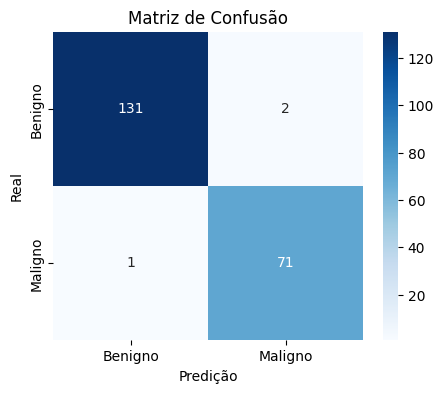

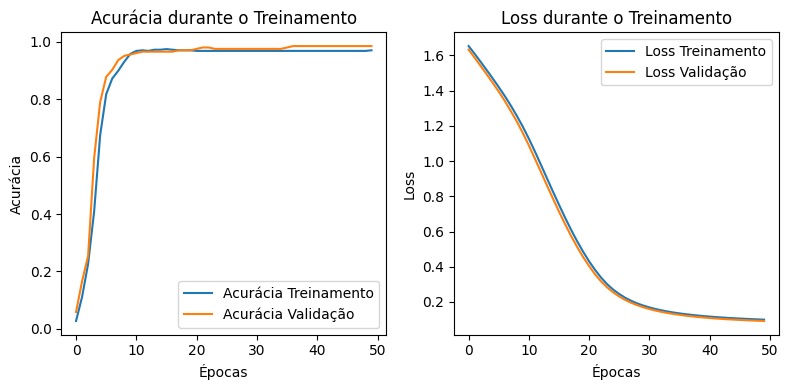

In [61]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss:.6f}')
print(f'Acc: {accuracy:.6f}')

# Predições
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


# Acc
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Treinamento')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.title('Loss durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# Exibindo os gráficos
plt.tight_layout()
plt.show()